In [5]:
import numpy as np
import struct
import os
import glob
import xarray as xr
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from mapper_functions import plot_global_tight_pcm, plot_NA_tight_pcm, plot_region

from helper import read_ObsFcstAna, read_tilecoord, get_tile_species_obs_values

In [10]:
expt_name = 'LS_DAv8_M36'

start_date = datetime(2002, 10, 1)
end_date = datetime(2006, 10, 1)

start_date_str = start_date.strftime('%Y/%m/%d')
end_date_str = end_date.strftime('%Y/%m/%d')

# ana_directory = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/snow_qc_expts/LS_DAv8_M36_t10/LS_DAv8_M36_t10/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M06'

ana_directory = f'/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'


In [12]:
# Initialize list
OFA_list = []

# Process each month (1-12)
for month in range(1, 13):
    # Find all directories for this month within date range
    month_pattern = os.path.join(ana_directory, 'Y*', f'M{month:02d}')
    month_dirs = sorted(glob.glob(month_pattern))
    
    # Process each directory if within date range
    for month_dir in month_dirs:
        # Extract year from path more explicitly
        try:
            year = int(month_dir.split('/Y')[-1][:4])
        except ValueError:
            print(f"Warning: Skipping directory with unexpected format: {month_dir}")
            continue
        
        # Check if directory is within date range
        if start_date <= datetime(year, month, 1) <= end_date:
            # Load all .bin files in directory
            OFA_list.extend(read_ObsFcstAna(fname) for fname in sorted(glob.glob(os.path.join(month_dir, '*.ldas_ObsFcstAna.*.bin'))))

print(f"Total files processed: {len(OFA_list)}")

reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M03/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050301_0000z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M03/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050301_0300z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M03/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050301_0600z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M03/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050301_0900z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M03/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050301_1200z.bin
reading from /U

reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M03/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050301_0000z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M03/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050301_0300z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M03/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050301_0600z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M03/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050301_0900z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M03/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050301_1200z.bin
reading from /U

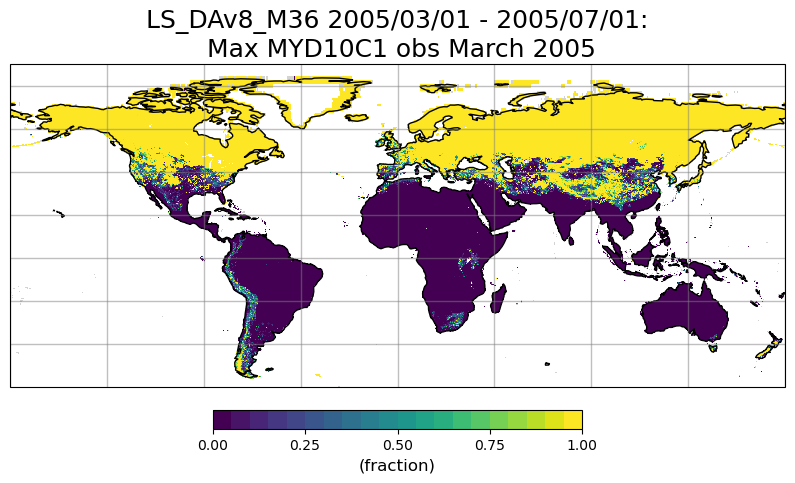

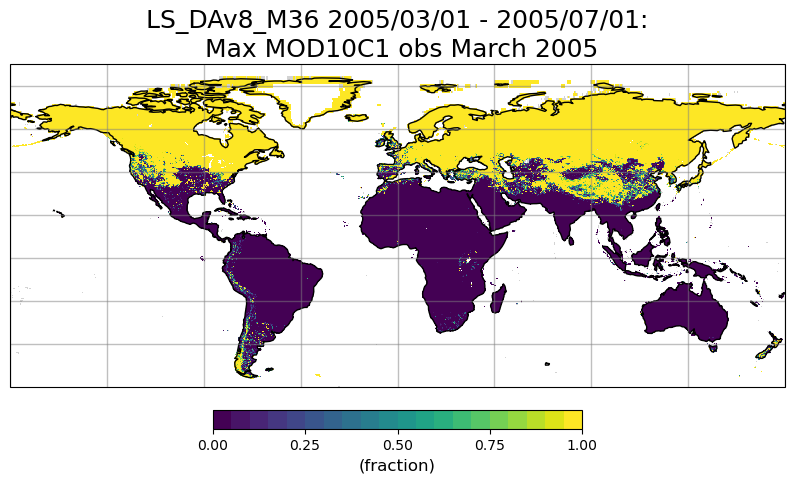

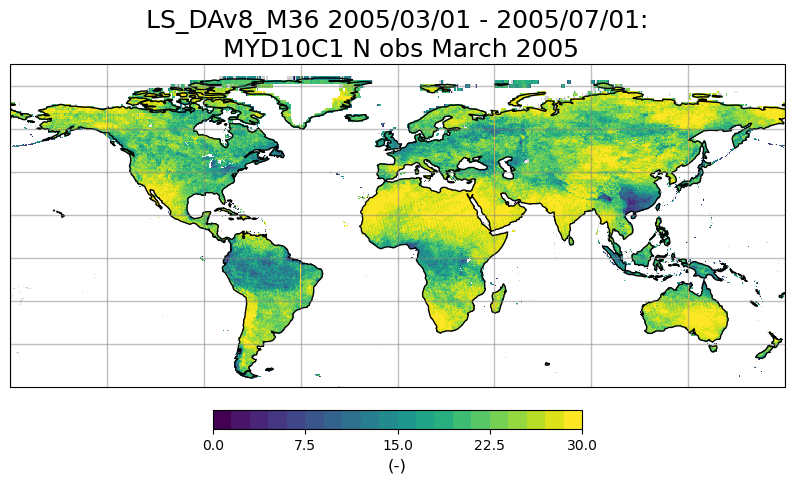

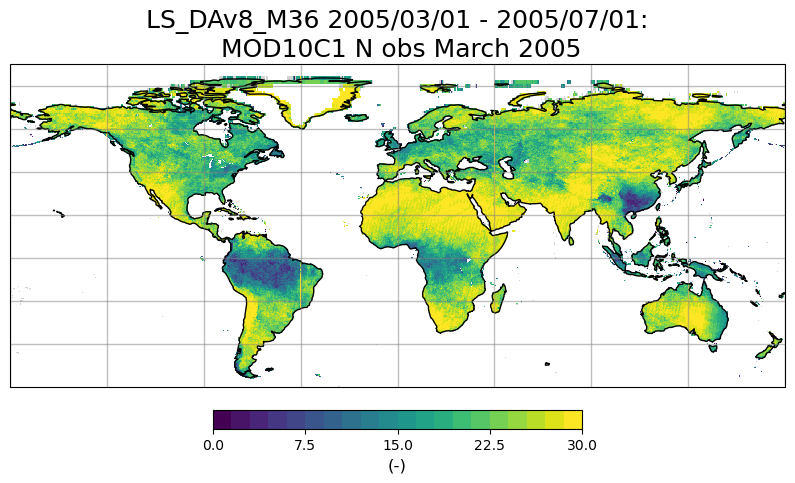

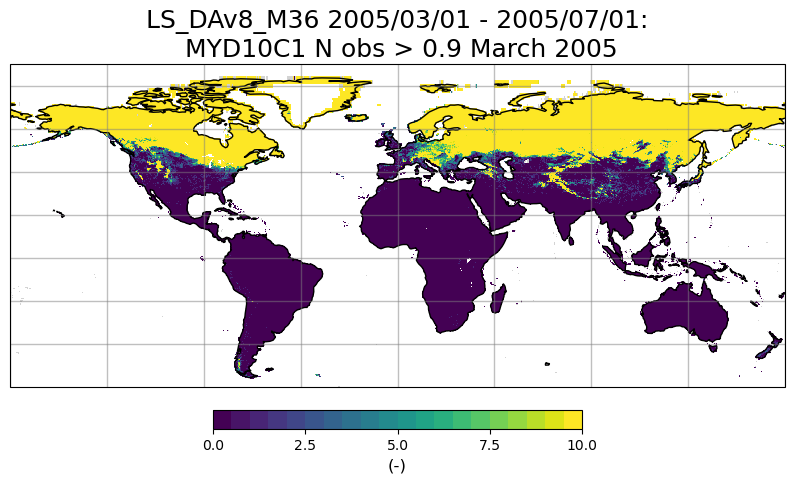

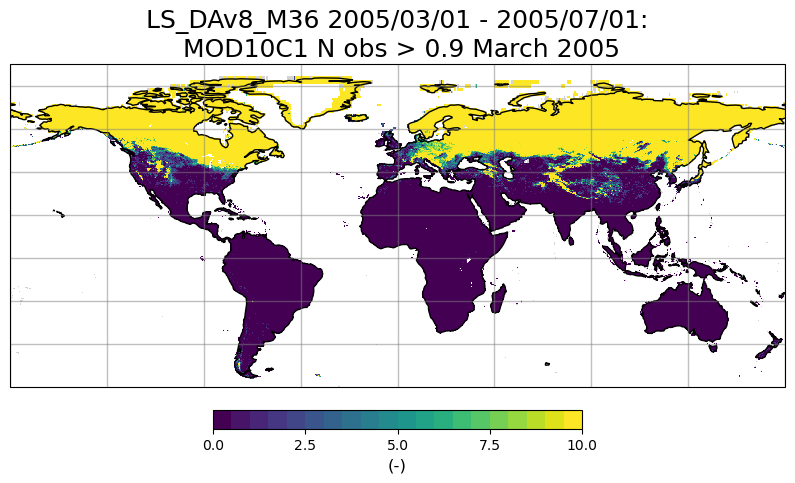

reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M04/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050401_0000z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M04/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050401_0300z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M04/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050401_0600z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M04/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050401_0900z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M04/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050401_1200z.bin
reading from /U

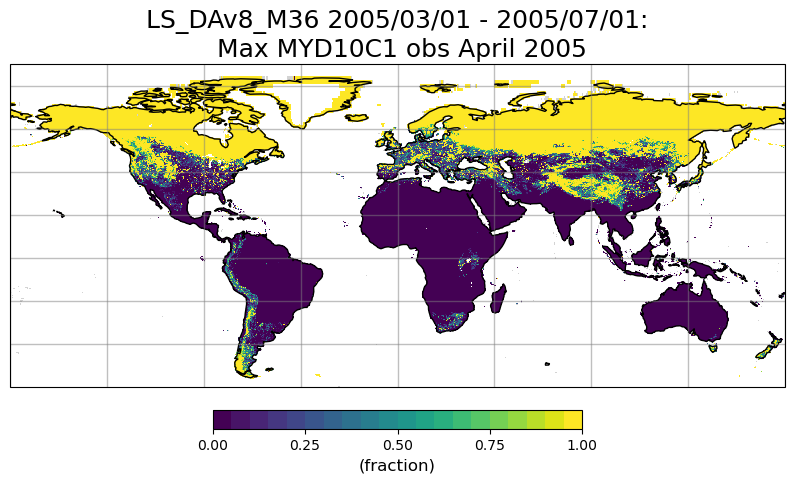

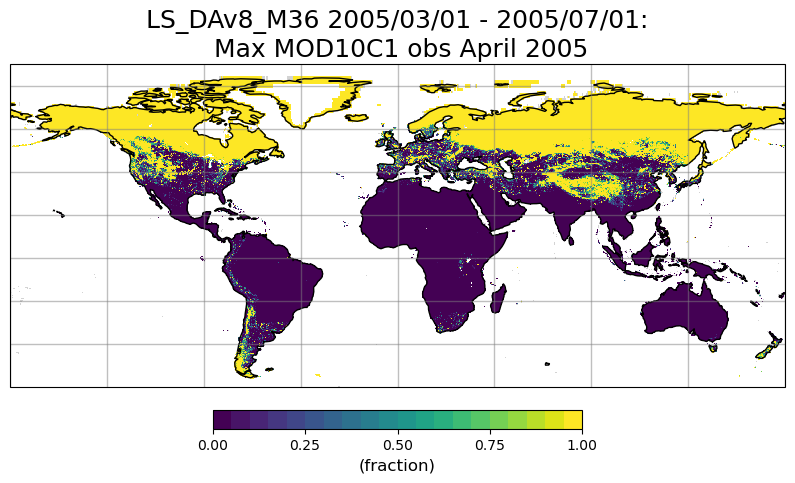

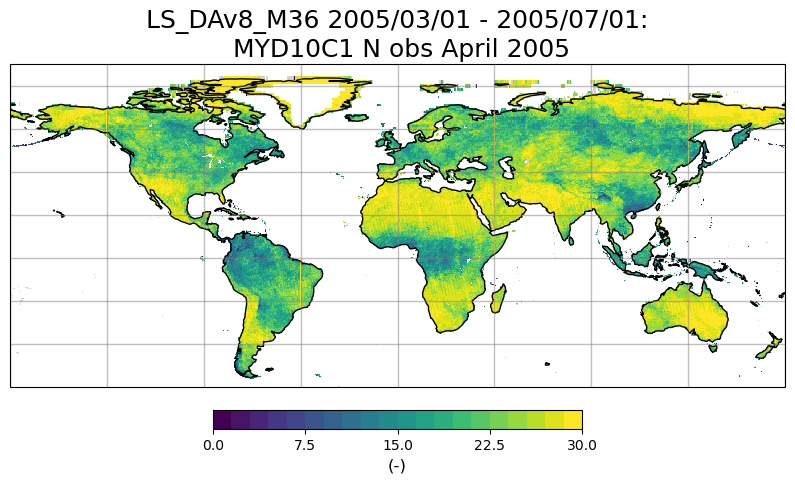

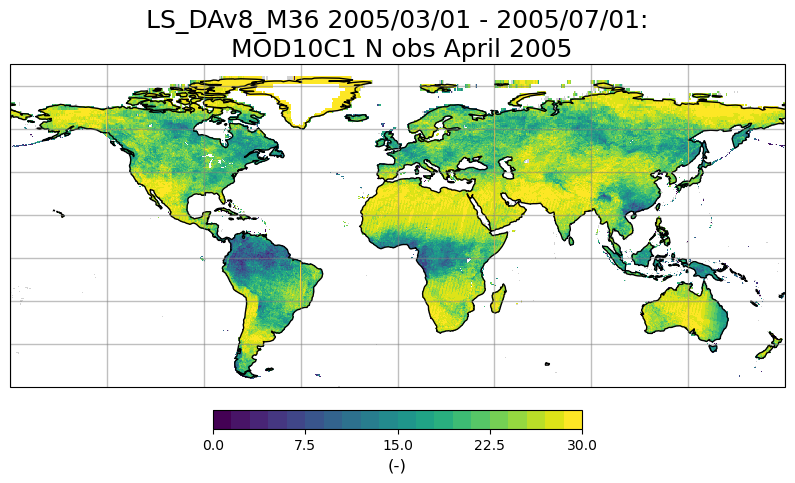

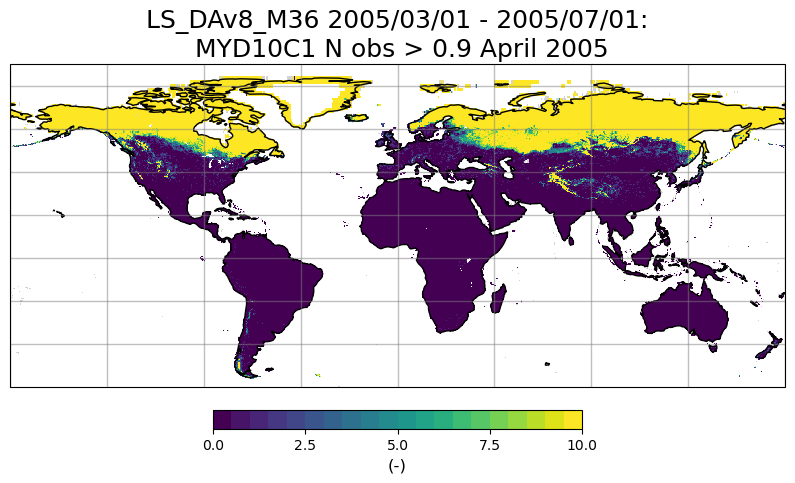

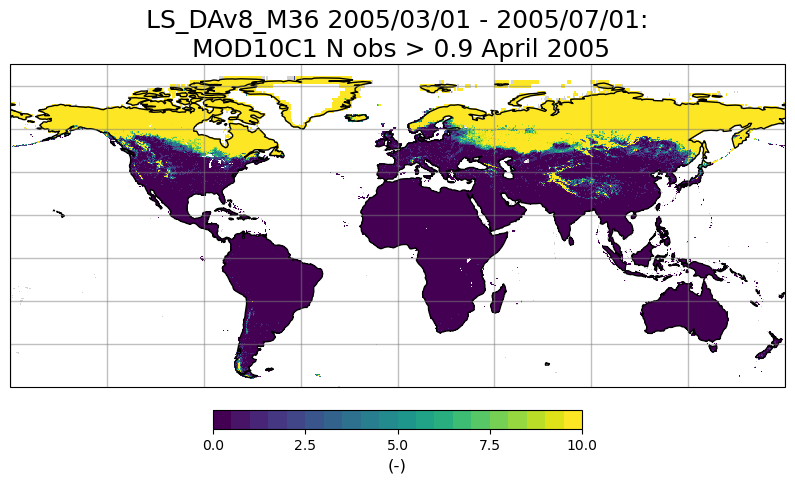

reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M05/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050501_0000z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M05/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050501_0300z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M05/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050501_0600z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M05/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050501_0900z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M05/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050501_1200z.bin
reading from /U

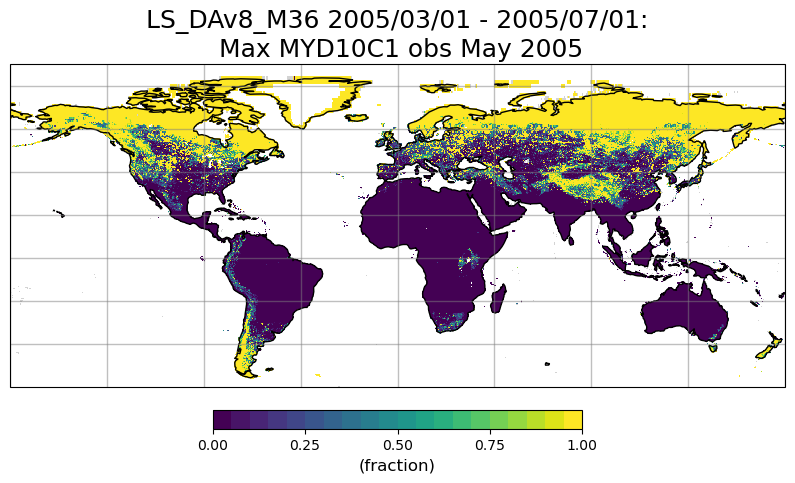

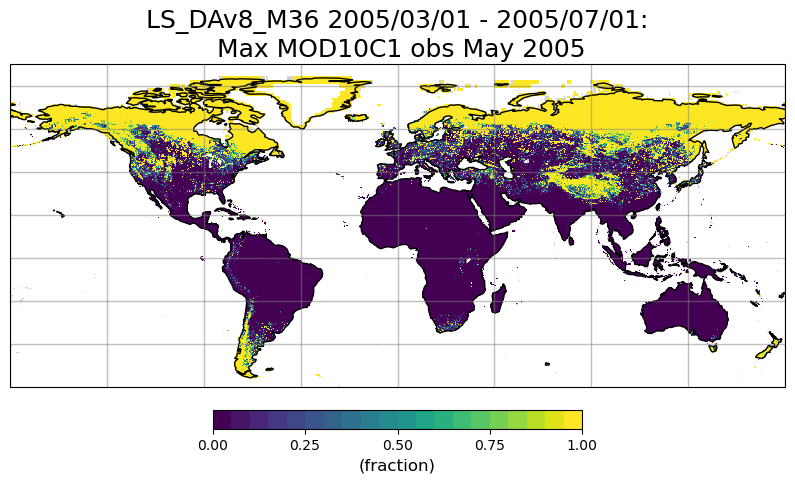

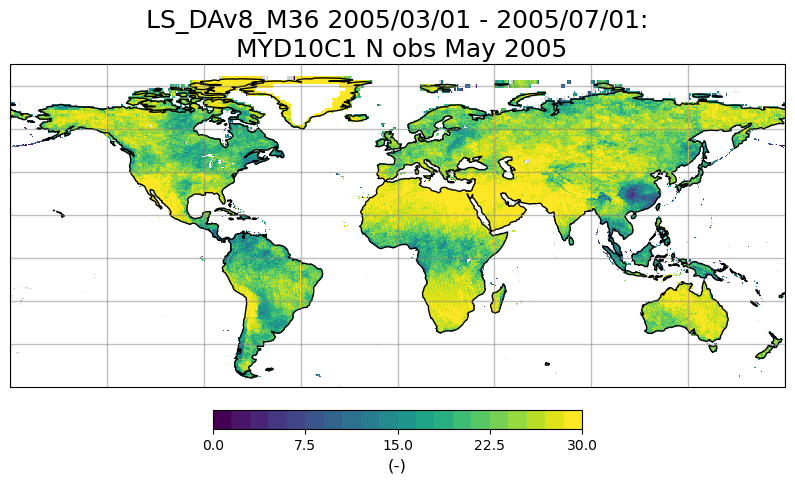

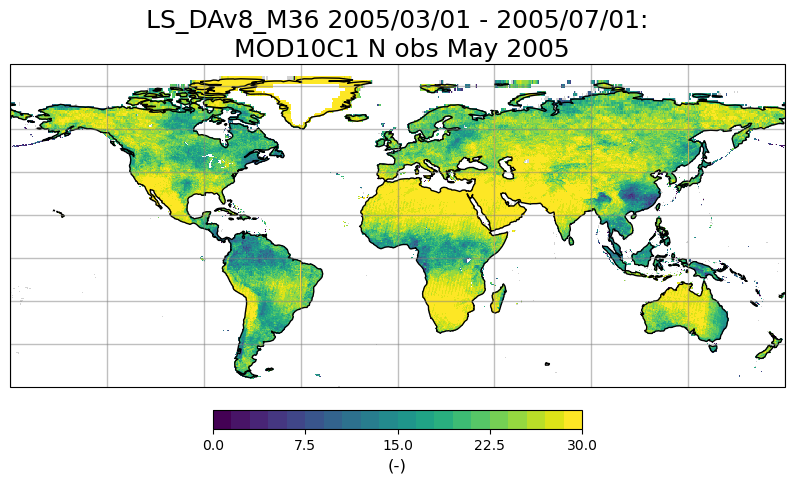

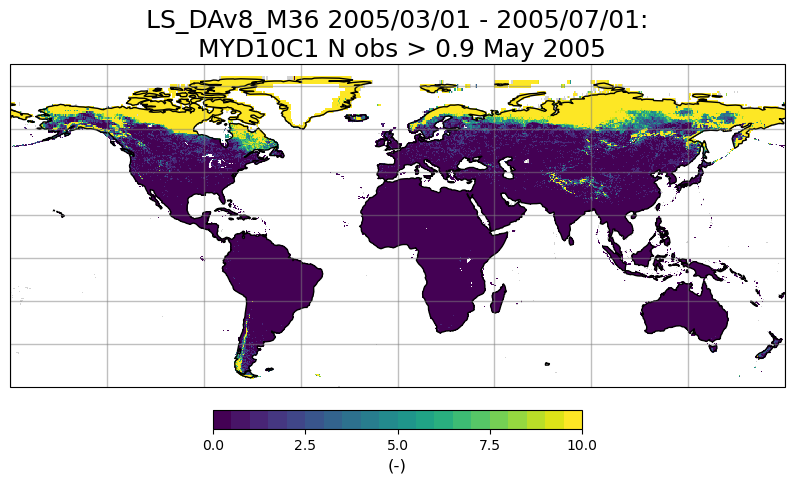

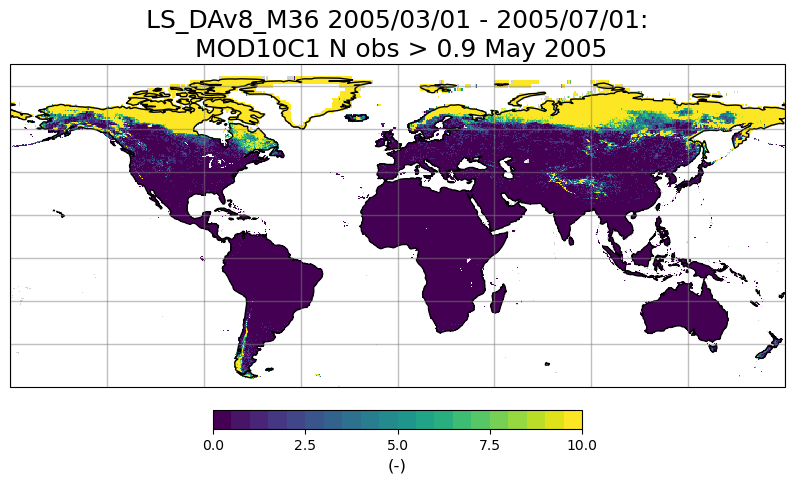

reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M06/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050601_0000z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M06/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050601_0300z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M06/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050601_0600z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M06/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050601_0900z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M06/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050601_1200z.bin
reading from /U

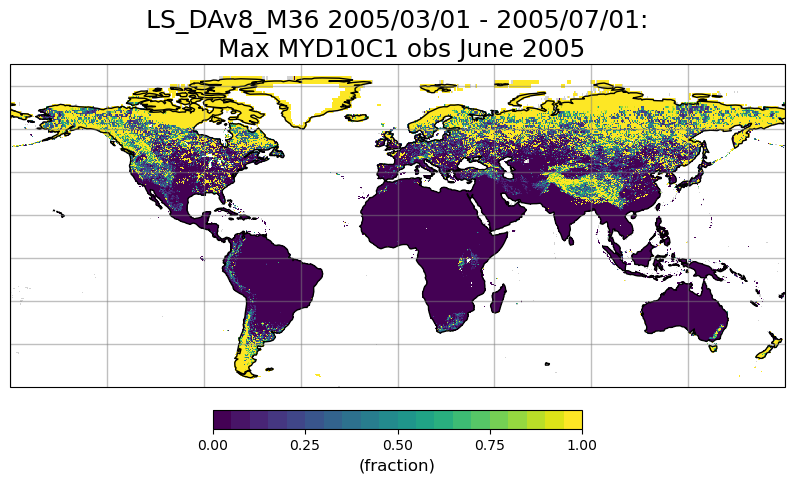

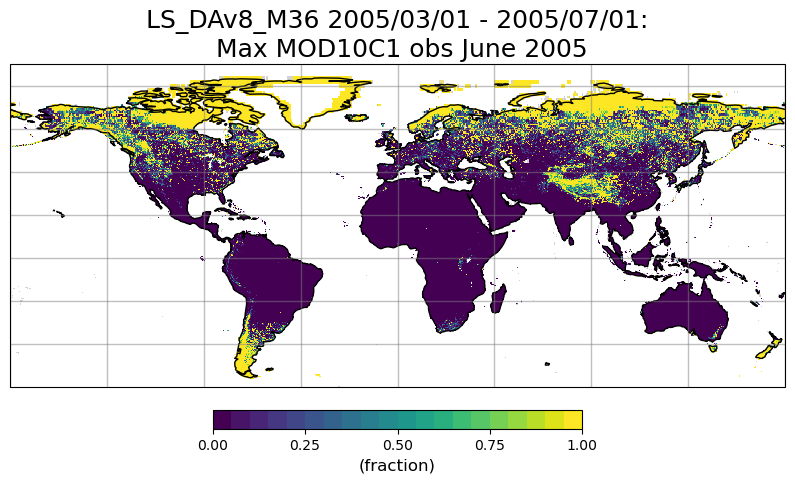

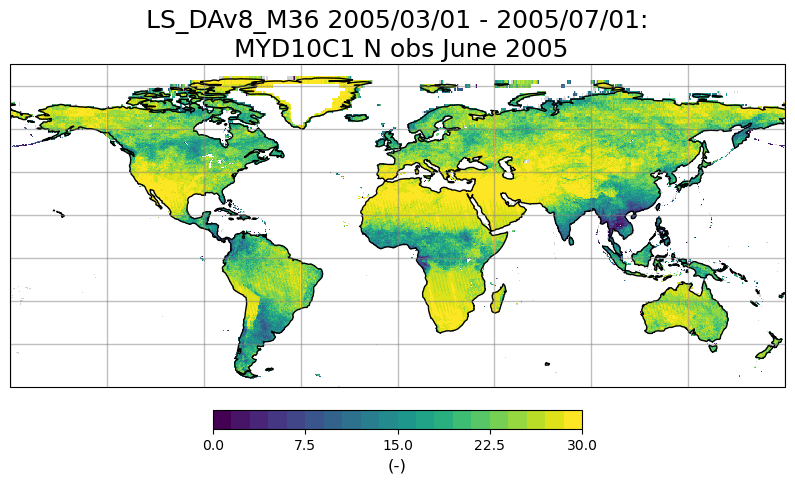

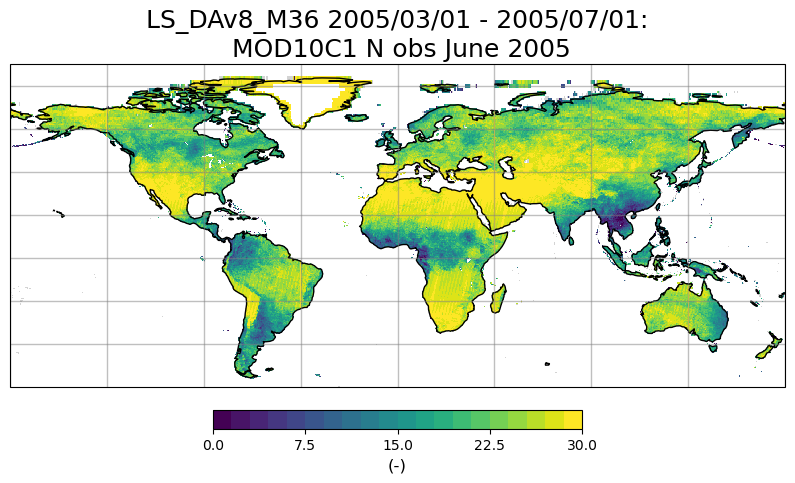

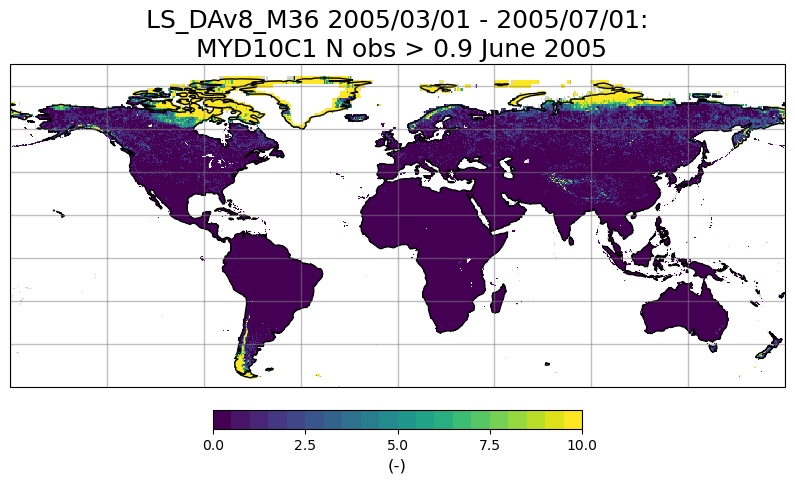

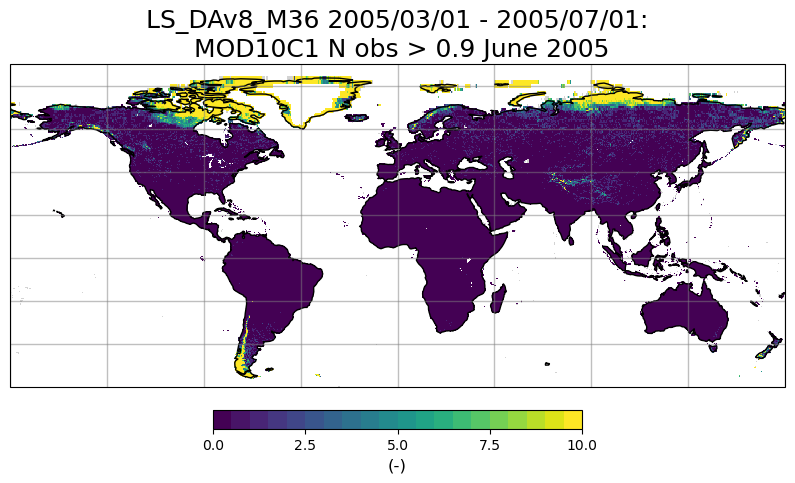

reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M07/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050701_0000z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M07/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050701_0300z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M07/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050701_0600z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M07/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050701_0900z.bin
reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2005/M07/LS_DAv8_M36.ens_avg.ldas_ObsFcstAna.20050701_1200z.bin
reading from /U

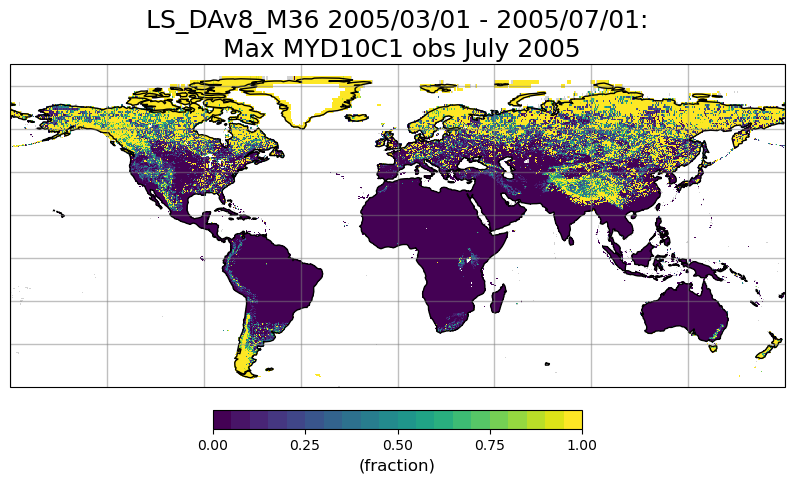

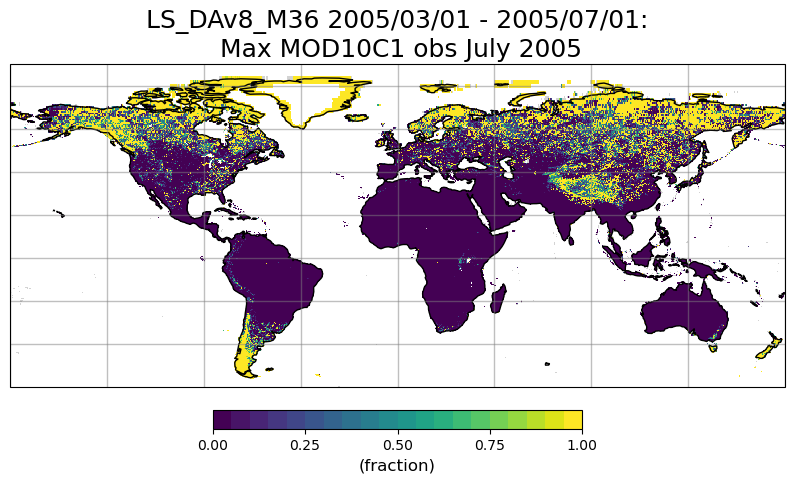

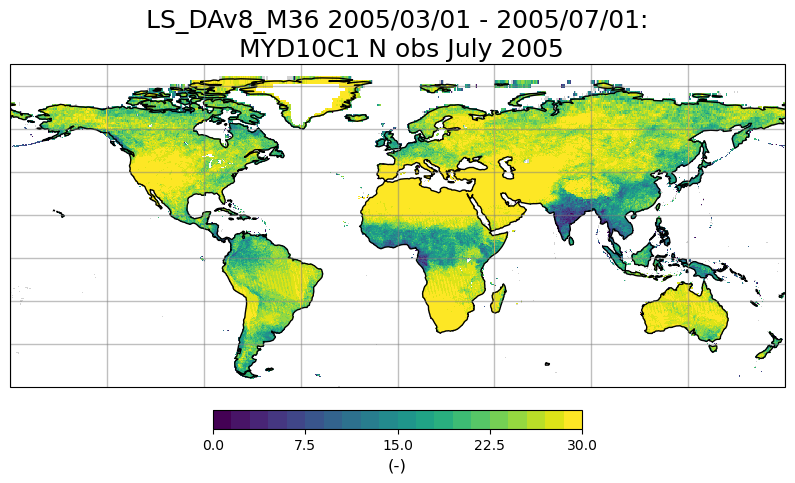

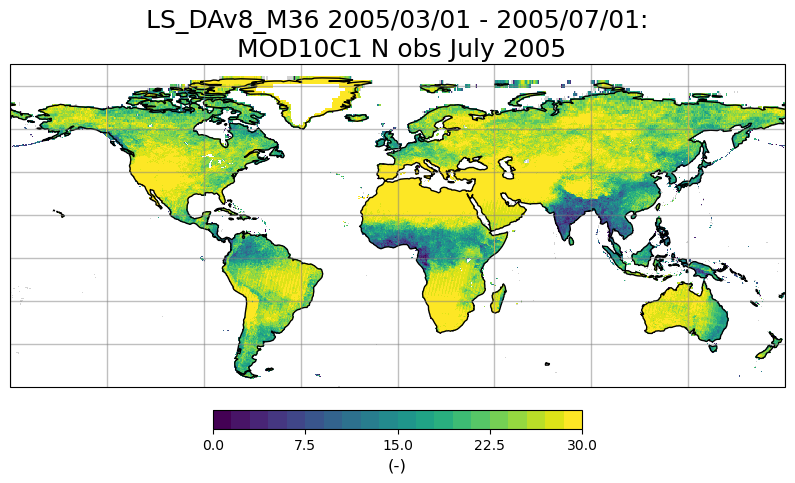

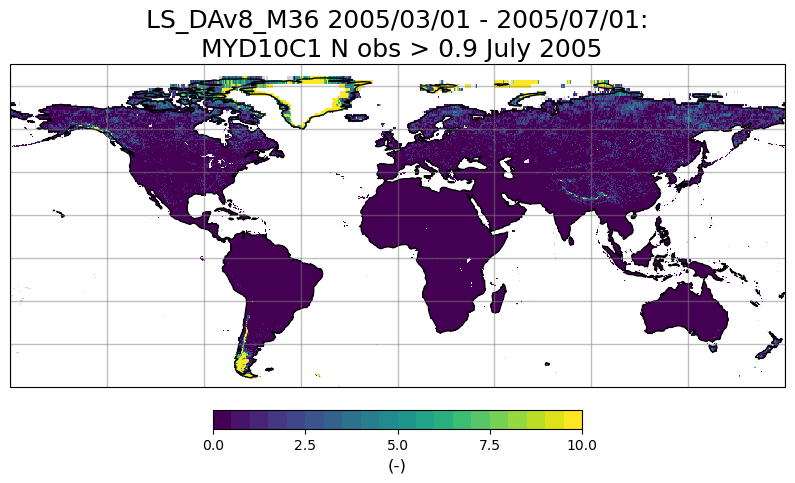

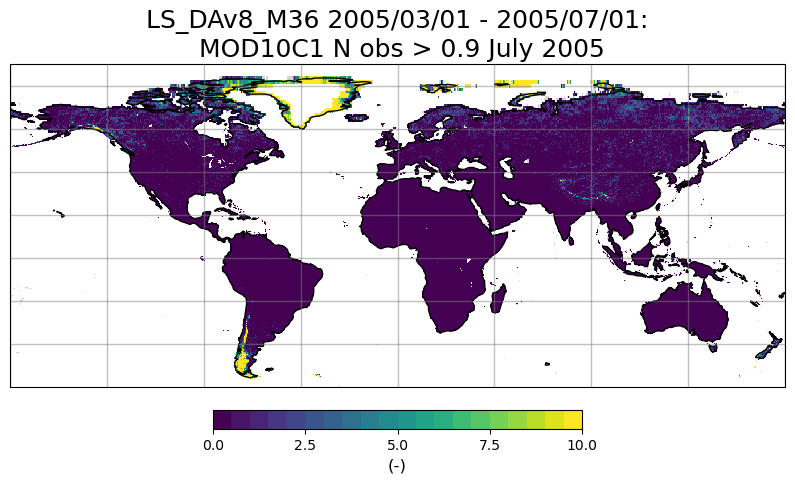

In [11]:
current_date = start_date
while current_date <= end_date:
    year_month_directory = os.path.join(ana_directory, 
                                        f"Y{current_date.year}", 
                                        f"M{current_date.month:02d}")    

    OFA_list =[]

    for fname in sorted([os.path.join(year_month_directory, f) for f in os.listdir(year_month_directory) if '.ldas_ObsFcstAna.' in f and f.endswith('.bin')]):
        if os.path.isfile(fname):
            OFA_list.append(read_ObsFcstAna(fname))

    if OFA_list:
        print(OFA_list[0].keys())
    else:
        print("OFA_list is empty.")   

    # Initialize lists to store filtered data
    all_tilenums = []
    all_species = []
    all_lats = []
    all_lons = []
    all_obs = []

    # Process each element in OFA_list
    for ofa in OFA_list:
        # Create mask for this element
        assim_mask = ofa['obs_assim'] == 1
        
        # Append filtered data
        all_tilenums.append(ofa['obs_tilenum'][assim_mask])
        all_species.append(ofa['obs_species'][assim_mask])
        all_lats.append(ofa['obs_lat'][assim_mask])
        all_lons.append(ofa['obs_lon'][assim_mask])
        all_obs.append(ofa['obs_obs'][assim_mask])

    # Create filtered dictionary with concatenated data
    filtered_data = {
        'obs_tilenum': np.concatenate(all_tilenums),
        'obs_species': np.concatenate(all_species),
        'obs_lat': np.concatenate(all_lats),
        'obs_lon': np.concatenate(all_lons),
        'obs_obs': np.concatenate(all_obs)
    }

    # Process filtered data
    stats = get_tile_species_obs_values(filtered_data)

    # Print summary
    print(f"Number of unique tiles: {len(stats['tiles'])}")
    print(f"Number of species: {len(stats['max_values'])}")
    for species, max_vals in stats['max_values'].items():
        print(f"Species {species}: max value = {np.max(max_vals)}")

    # Initialize map_array with NaN values
    map_array = np.empty((stats['lon'].shape[0], 3))  # Shape: (number of tiles, 3)
    map_array.fill(np.nan)

    # Fill longitude and latitude columns
    map_array[:, 1] = stats['lon']  # Assuming `lon` contains longitude values
    map_array[:, 2] = stats['lat']  # Assuming `lat` contains latitude values

    map_array[:, 0] = stats['max_values'][12]
    plot_global_tight_pcm(map_array, False, False, f"{expt_name} {start_date_str} - {end_date_str}:\n Max MYD10C1 obs {current_date.strftime('%B %Y')}", 'fraction', 0, 1)

    map_array[:, 0] = stats['max_values'][13]
    plot_global_tight_pcm(map_array, False, False, f"{expt_name} {start_date_str} - {end_date_str}:\n Max MOD10C1 obs {current_date.strftime('%B %Y')}", 'fraction', 0, 1)

    map_array[:, 0] = stats['num_obs'][12]
    plot_global_tight_pcm(map_array, False, False, f"{expt_name} {start_date_str} - {end_date_str}:\n MYD10C1 N obs {current_date.strftime('%B %Y')}", '-', 0, 30)

    map_array[:, 0] = stats['num_obs'][13]
    plot_global_tight_pcm(map_array, False, False, f"{expt_name} {start_date_str} - {end_date_str}:\n MOD10C1 N obs {current_date.strftime('%B %Y')}", '-', 0, 30)

    map_array[:, 0] = stats['num_obs_gt_0.9'][12]
    plot_global_tight_pcm(map_array, False, False, f"{expt_name} {start_date_str} - {end_date_str}:\n MYD10C1 N obs > 0.9 {current_date.strftime('%B %Y')}", '-', 0, 10)

    map_array[:, 0] = stats['num_obs_gt_0.9'][13]
    plot_global_tight_pcm(map_array, False, False, f"{expt_name} {start_date_str} - {end_date_str}:\n MOD10C1 N obs > 0.9 {current_date.strftime('%B %Y')}", '-', 0, 10)

    # Increment the date
    current_date += relativedelta(months=1)

In [ ]:

# Usage over CONUS
lon_min = -125.0
lon_max = -66.0
lat_min = 24.0
lat_max = 50.0
    
    # Plot the data
plot_region(map_array, 
        lon_min, lon_max,
        lat_min, lat_max,
        meanflag=False,
        saveflag=False,
        units='SCF',
        plot_title=f'{expt_name} {start_date_str} - {end_date_str}:\n MODIS Snow Cover Fraction',
        cmin=0,
        cmax=1,
        cmap='viridis')


In [ ]:
root_directory = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/snow_qc_expts/LS_DAv8_M36_snow_qc/test_LS_DAv8_M36_snow_qc/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2005/M07/'

files = glob.glob(os.path.join(root_directory, 'test_LS_DAv8_M36_snow_qc.inst3_1d_lndfcstana_Nt.*.nc4'))

# Load the data 
ds_lndfcstana = xr.open_mfdataset(files, combine='nested', concat_dim="time")

# Sort the dataset by the time dimension
ds_lndfcstana = ds_lndfcstana.sortby('time')

# Extract the time variable
time_var = ds_lndfcstana['time']
# Convert the time variable to a numpy array
time_values = time_var.values

def create_date_array(time_values, start_date):
    """Convert array of 3-hour increments to datetime objects"""
    # Convert numpy integers to Python integers
    time_ints = [int(t) for t in time_values]
    
    # Create datetime array
    dates = [start_date + timedelta(hours=3*t) for t in time_ints]
    return np.array(dates)

# Create date array
start_date = datetime(2005, 7, 1, 3)
dates = create_date_array(time_values, start_date)

# Verify conversion
print(f"First date: {dates[0]}")
print(f"Last date: {dates[-1]}")
print(f"Total timesteps: {len(dates)}")

# Print the shape of the dataset
print(ds_lndfcstana.dims)
# Print the names of the variables in the dataset
print(ds_lndfcstana.data_vars)

TSOIL1_FCST = ds_lndfcstana['TSOIL1_FCST']

# Calculate min and max per tile
tile_min = TSOIL1_FCST.min(dim='time') - 273.15
tile_max = TSOIL1_FCST.max(dim='time') - 273.15

# Convert to numpy arrays (compute dask arrays)
min_vals = tile_min.compute()
max_vals = tile_max.compute()

temperature_threshold = 10.0

t_thres_str = f'{temperature_threshold:.1f}C'

min_vals_thres = xr.where(min_vals > temperature_threshold, 1, 0)
max_vals_thres = xr.where(max_vals > temperature_threshold, 1, 0)
# Convert to numpy arrays
min_vals_thres = min_vals_thres.values
max_vals_thres = max_vals_thres.values

# Print some statistics
print(f"Global min: {min_vals.min():.2f}K")
print(f"Global max: {max_vals.max():.2f}K")
print(f"Number of tiles: {len(min_vals)}")

# Convert xarray time coordinates to datetime
TSOIL1_FCST = TSOIL1_FCST.assign_coords(time=dates)

# Resample to daily frequency and get maximum
daily_max = TSOIL1_FCST.resample(time='D').max()

# Get minimum of daily maximums for each tile
min_of_daily_max = daily_max.min(dim='time') - 273.15

min_of_daily_max_thres = xr.where(min_of_daily_max > temperature_threshold, 1, 0)

# Resample to daily frequency and get mean
daily_mean = TSOIL1_FCST.resample(time='D').mean()
# Get minimum of daily means for each tile
min_of_daily_mean = daily_mean.min(dim='time') - 273.15
min_of_daily_mean_thres = xr.where(min_of_daily_mean > temperature_threshold, 1, 0)

print(f"Shape of min_of_daily_max: {min_of_daily_max.shape}")
print(f"Global min of daily max: {min_of_daily_max.min().values:.2f}°C")
print(f"Global max of daily max: {min_of_daily_max.max().values:.2f}°C")


# Get lons from first time slice
lons = ds_lndfcstana['lon'].isel(time=0).values
lats = ds_lndfcstana['lat'].isel(time=0).values

# Create map_array for plotting
map_array = np.empty((len(lons), 3))  # Shape: (number of tiles, 3)
map_array.fill(np.nan)
# Fill longitude and latitude columns
map_array[:, 1] = lons  # Assuming `lon` contains longitude values
map_array[:, 2] = lats  # Assuming `lat` contains latitude values
# Fill temperature values
map_array[:, 0] = min_vals
# Plotting
plot_global_tight_pcm(map_array, False, False, f'{expt_name} {start_date_str} - {end_date_str}:\n Min TSOIL1_FCST 2005-07', 'C', 0, 30)
plot_NA_tight_pcm(map_array, False, False, f'{expt_name} {start_date_str} - {end_date_str}:\n Min TSOIL1_FCST 2005-07', 'C', 0, 30)

map_array[:, 0] = min_vals_thres
# Plotting
plot_global_tight_pcm(map_array, False, False, f'{expt_name} {start_date_str} - {end_date_str}:\n Min TSOIL1_FCST 2005-07', f'{t_thres_str} threshold exceeded', 0, 1)
plot_NA_tight_pcm(map_array, False, False, f'{expt_name} {start_date_str} - {end_date_str}:\n Min TSOIL1_FCST 2005-07', f'{t_thres_str} threshold exceeded', 0, 1)

# Fill temperature values
map_array[:, 0] = max_vals
# Plotting
plot_global_tight_pcm(map_array, False, False, f'{expt_name} {start_date_str} - {end_date_str}:\n Max TSOIL1_FCST 2005-07', 'tC', 0, 30)
plot_NA_tight_pcm(map_array, False, False, f'{expt_name} {start_date_str} - {end_date_str}:\n Max TSOIL1_FCST 2005-07', 'C', 0, 30)

map_array[:, 0] = max_vals_thres
# Plotting
plot_global_tight_pcm(map_array, False, False, f'{expt_name} {start_date_str} - {end_date_str}:\n Max TSOIL1_FCST 2005-07', f'{t_thres_str} threshold exceeded', 0, 1)
plot_NA_tight_pcm(map_array, False, False, f'{expt_name} {start_date_str} - {end_date_str}:\n Max TSOIL1_FCST 2005-07', f'{t_thres_str} threshold exceeded', 0, 1)

map_array[:, 0] = min_of_daily_max
# Plotting
plot_global_tight_pcm(map_array, False, False, f'{expt_name} {start_date_str} - {end_date_str}:\n Min of daily max TSOIL1_FCST 2005-07', 'C', 0, 30)
plot_NA_tight_pcm(map_array, False, False, f'{expt_name} {start_date_str} - {end_date_str}:\n Min of daily max TSOIL1_FCST 2005-07', 'C', 0, 30)

map_array[:, 0] = min_of_daily_max_thres
# Plotting
plot_global_tight_pcm(map_array, False, False, f'{expt_name} {start_date_str} - {end_date_str}:\n Min of daily max TSOIL1_FCST 2005-07', f'{t_thres_str} threshold exceeded', 0, 1)
plot_NA_tight_pcm(map_array, False, False, f'{expt_name} {start_date_str} - {end_date_str}:\n Min of daily max TSOIL1_FCST 2005-07', f'{t_thres_str} threshold exceeded', 0, 1)

map_array[:, 0] = min_of_daily_mean

# Plotting
plot_global_tight_pcm(map_array, False, False, f'{expt_name} {start_date_str} - {end_date_str}:\n Min of daily mean TSOIL1_FCST 2005-07', 'C', 0, 30)
plot_NA_tight_pcm(map_array, False, False, f'{expt_name} {start_date_str} - {end_date_str}:\n Min of daily mean TSOIL1_FCST 2005-07', 'C', 0, 30)

map_array[:, 0] = min_of_daily_mean_thres

# Plotting
plot_global_tight_pcm(map_array, False, False, f'{expt_name} {start_date_str} - {end_date_str}:\n Min of daily mean TSOIL1_FCST 2005-07', f'{t_thres_str} threshold exceeded', 0, 1)
plot_NA_tight_pcm(map_array, False, False, f'{expt_name} {start_date_str} - {end_date_str}:\n Min of daily mean TSOIL1_FCST 2005-07', f'{t_thres_str} threshold exceeded', 0, 1)

# Close the dataset
ds_lndfcstana.close()
